<a href="https://colab.research.google.com/github/huiesoo/esaa/blob/main/23-2/%EB%B0%A9%ED%95%99%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 패키지 설치

In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,677 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 설치
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumGothic')

# 2. 데이터 로드

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/문화환경만족도.csv',encoding='utf-8')
data1 = data1[data1['구분별(1)'] == '지역소분류별']
data1 = data1.iloc[:,1:3]
data1 = data1.sort_values(by='구분별(2)', ascending=True)
data1 = data1.reset_index(drop=True)
data1 = data1.rename(columns={'2022': '문화환경만족도'})
data1.head(3)

,구분별(2),문화환경만족도
0,강남구,5.53
1,강동구,5.88
2,강북구,6.02


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/공연장.csv',encoding='utf-8')
data2 = data2.iloc[3:,1:3]
data2 = data2.sort_values(by='자치구별(2)', ascending=True)
data2 = data2.reset_index(drop=True)
data2 = data2.rename(columns={'2022': '공연장'})
data2.head(3)

,자치구별(2),공연장
0,강남구,41
1,강동구,5
2,강북구,6


In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/공공도서관.csv',encoding='utf-8')
data3 = data3.iloc[4:,1:3]
data3 = data3.sort_values(by='자치구별(2)', ascending=True)
data3 = data3.reset_index(drop=True)
data3 = data3.rename(columns={'2022': '공공도서관'})
data3.head(3)

,자치구별(2),공공도서관
0,강남구,15
1,강동구,9
2,강북구,7


In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/문화활동연간방문횟수.csv',encoding='utf-8')
data4.columns = data4.iloc[0,:]
data4 = data4[data4['구분별(1)']=='지역소분류별']
data4 = data4.drop('구분별(1)',axis=1)
data4 = data4.sort_values(by='구분별(2)', ascending=True)
data4 = data4.reset_index(drop=True)
data4 = data4.iloc[:,[0,1,2,5,6,7]]
data4.head(3)

,구분별(2),전시회 관람,박물관 관람,연극공연 관람,극장에서 영화관람,대중공연 관람
0,강남구,0.06,0.06,0.18,2.72,0.14
1,강동구,0.11,0.16,0.09,1.72,0.10
2,강북구,0.03,0.03,0.11,1.03,0.07


In [ ]:
data5 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/영화관.csv',encoding='utf-8')
data5 = data5.iloc[2:,1:3]
data5 = data5.sort_values(by='자치구별(2)', ascending=True)
data5 = data5.reset_index(drop=True)
data5 = data5.rename(columns={'2022': '영화관'})
data5.head(3)

,자치구별(2),영화관
0,강남구,10
1,강동구,3
2,강북구,3


In [ ]:
data6 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/인구밀도.csv',encoding='utf-8')
data6 = data6[data6['동별(3)']=='소계']
data6 = data6.iloc[1:,[1,3,4,5]]
data6 = data6.rename(columns={'2022': '인구'})
data6 = data6.rename(columns={'2022.1': '면적'})
data6 = data6.rename(columns={'2022.2': '인구밀도'})
data6 = data6.sort_values(by='동별(2)', ascending=True)
data6 = data6.reset_index(drop=True)
data6 = data6.iloc[:,[0,3]]
data6.head(3)

,동별(2),인구밀도
0,강남구,13522
1,강동구,18871
2,강북구,12614


In [ ]:
data7 =  pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/전시시설.csv',encoding='utf-8')
data7 = data7.iloc[:,[1,-2,-1]]
data7.columns = data7.iloc[0,:]
data7 = data7.drop([0,1],axis=0)
data7 = data7.sort_values(by='자치구별(2)', ascending=True)
data7 = data7.reset_index(drop=True)
data7.replace('-', 0, inplace=True)
data7.head(3)

,자치구별(2),박물관,미술관
0,강남구,7,4
1,강동구,2,0
2,강북구,3,0


In [ ]:
data8 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/생활환경만족도.csv',encoding='utf-8')
data8 = data8[data8['구분별(1)'] == '지역소분류']
data8 = data8.iloc[:, 1:3]
data8 = data8.sort_values(by='구분별(2)', ascending=True)
data8 = data8.reset_index(drop=True)
data8 = data8.rename(columns={'2022': '생활환경만족도'})
data8.head(3)

,구분별(2),생활환경만족도
0,강남구,6.81
1,강동구,6.68
2,강북구,6.86


In [ ]:
# data9 =  pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/지역문화복지시설.csv',encoding='utf-8')
# data9

In [ ]:
data10 = pd.read_excel('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/공원.xlsx')
data10 = data10.sort_values(by='자치구', ascending=True)
data10 = data10.reset_index(drop=True)
data10.head(3)

,자치구,1인당도보생활권공원면적,공원율
0,강남구,6.848822,19.732843
1,강동구,4.584144,13.852781
2,강북구,6.897536,61.420249


In [ ]:
data11 = pd.read_excel('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/우울감 경험률.xlsx')
data11 = data11.iloc[3:,:]
data11 = data11[data11['구분']=='전체']
data11 = data11.drop('구분',axis=1)
data11 = data11.sort_values(by='지역', ascending=True)
data11 = data11.reset_index(drop=True)
data11.head(3)

,지역,우울감경험률
0,강남구,7.3
1,강동구,7.5
2,강북구,4.5


In [ ]:
data12=pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/대기오염도.csv',encoding='euc-kr')
data12['측정일시'] = pd.to_datetime(data12['측정일시'])
data12['월'] = data12['측정일시'].dt.month
data12['일'] = data12['측정일시'].dt.day
data12['시간'] = data12['측정일시'].dt.hour
data12 = data12.drop('측정소코드',axis=1)

seoul = data12[data12['시도'] == '서울']
seoul.replace(-999, np.nan, inplace=True)
seoul = seoul.dropna(axis=0, how='any')
seoul_mean = seoul.groupby('군구').mean()[[ '아황산가스', '미세먼지', '오존', '이산화질소', '일산화탄소', '초미세먼지']]

data12 = pd.DataFrame(seoul_mean.loc[:,'미세먼지'])
data12 = data12.reset_index(drop=True)
data12.head(3)

,미세먼지
0,32.102133
1,34.122311
2,34.084115


In [ ]:
data13 = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/프로젝트/지역녹지만족도.csv',encoding='utf-8')
data13 = data13[data13['구분별(1)'] == '지역소분류']
data13 = data13.iloc[:, [1, 7]]
data13 = data13.sort_values(by='구분별(2)', ascending=True)
data13 = data13.reset_index(drop=True)
data13 = data13.rename(columns={'2022.5': '지역녹지만족도'})
data13.head(3)

,구분별(2),지역녹지만족도
0,강남구,6.67
1,강동구,6.58
2,강북구,6.13


# 3. 데이터 프레임 생성

In [ ]:
regions = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [ ]:
final = pd.concat([data1,data2,data3,data4,data5,data6,data7,data10,data11,data12,data13],axis=1)
final.index = regions
final = final.drop(['구분별(2)','자치구별(2)','자치구','지역','동별(2)'],axis=1)
final

,문화환경만족도,공연장,공공도서관,전시회 관람,박물관 관람,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,박물관,미술관,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도
강남구,5.53,41,15,0.06,0.06,0.18,2.72,0.14,10,13522,7,4,6.848822,19.732843,7.3,32.102133,6.67
강동구,5.88,5,9,0.11,0.16,0.09,1.72,0.10,3,18871,2,0,4.584144,13.852781,7.5,34.122311,6.58
강북구,6.02,6,7,0.03,0.03,0.11,1.03,0.07,3,12614,3,0,6.897536,61.420249,4.5,34.084115,6.13
강서구,5.91,4,9,0.06,0.09,0.14,1.17,0.10,6,13862,3,1,6.144470,10.899614,7.2,36.577829,6.52
관악구,5.34,1,5,0.13,0.21,0.18,1.65,0.08,2,16951,2,2,3.925620,42.224954,8.1,33.933232,6.01
광진구,5.64,14,7,0.06,0.07,0.29,1.82,0.05,6,20586,3,0,3.847345,20.277061,8.4,31.658278,5.58
구로구,5.43,7,12,0.06,0.09,0.07,1.38,0.06,3,20794,2,0,3.960280,18.451448,7.2,34.838610,5.90
금천구,5.54,5,4,0.17,0.10,0.09,1.40,0.01,2,18649,0,0,2.321703,21.307882,11.9,31.056885,5.88
노원구,5.49,5,9,0.03,0.03,0.08,0.88,0.02,5,14335,3,2,3.726753,41.597091,6.3,33.565002,5.85
도봉구,5.56,5,9,0.17,0.28,0.10,1.43,0.06,2,15205,2,0,3.572487,49.155172,7.5,29.726439,6.48


# 4. 데이터 전처리

## (1) 결측치

In [ ]:
final.isnull().sum()

문화환경만족도         0
공연장             0
공공도서관           0
전시회 관람          0
박물관 관람          0
연극공연 관람         0
극장에서 영화관람       0
대중공연 관람         0
영화관             0
인구밀도            0
박물관             0
미술관             0
1인당도보생활권공원면적    0
공원율             0
우울감경험률          0
미세먼지            0
지역녹지만족도         0
dtype: int64

## (2) 데이터 탐색

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   문화환경만족도       25 non-null     object 
 1   공연장           25 non-null     object 
 2   공공도서관         25 non-null     object 
 3   전시회 관람        25 non-null     object 
 4   박물관 관람        25 non-null     object 
 5   연극공연 관람       25 non-null     object 
 6   극장에서 영화관람     25 non-null     object 
 7   대중공연 관람       25 non-null     object 
 8   영화관           25 non-null     object 
 9   인구밀도          25 non-null     object 
 10  박물관           25 non-null     object 
 11  미술관           25 non-null     object 
 12  1인당도보생활권공원면적  25 non-null     float64
 13  공원율           25 non-null     float64
 14  우울감경험률        25 non-null     float64
 15  미세먼지          25 non-null     float64
 16  지역녹지만족도       25 non-null     object 
dtypes: float64(4), object(13)
memory usage: 3.5+ KB


In [ ]:
# 수치형으로 바꾸기
final = final.apply(pd.to_numeric)
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   문화환경만족도       25 non-null     float64
 1   공연장           25 non-null     int64  
 2   공공도서관         25 non-null     int64  
 3   전시회 관람        25 non-null     float64
 4   박물관 관람        25 non-null     float64
 5   연극공연 관람       25 non-null     float64
 6   극장에서 영화관람     25 non-null     float64
 7   대중공연 관람       25 non-null     float64
 8   영화관           25 non-null     int64  
 9   인구밀도          25 non-null     int64  
 10  박물관           25 non-null     int64  
 11  미술관           25 non-null     int64  
 12  1인당도보생활권공원면적  25 non-null     float64
 13  공원율           25 non-null     float64
 14  우울감경험률        25 non-null     float64
 15  미세먼지          25 non-null     float64
 16  지역녹지만족도       25 non-null     float64
dtypes: float64(11), int64(6)
memory usage: 3.5+ KB


In [ ]:
final.describe()

,문화환경만족도,공연장,공공도서관,전시회 관람,박물관 관람,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,박물관,미술관,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.00000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,5.741600,17.440000,7.960000,0.099600,0.104800,0.161600,1.60560,0.07080,3.88000,16810.200000,5.160000,1.840000,6.203770,27.044817,7.284000,32.915439,6.157200
std,0.473196,33.112284,2.879236,0.055564,0.071886,0.076304,0.46898,0.03774,2.40347,4708.928682,6.829348,4.089417,3.700219,14.542660,2.080801,1.873678,0.304761
min,3.990000,1.000000,4.000000,0.030000,0.020000,0.070000,0.88000,0.01000,1.00000,6365.000000,0.000000,0.000000,2.321703,8.112305,3.200000,29.340274,5.510000
25%,5.540000,5.000000,6.000000,0.060000,0.060000,0.110000,1.38000,0.06000,2.00000,13862.000000,2.000000,0.000000,3.847345,17.520850,6.300000,31.758516,5.930000
50%,5.740000,7.000000,8.000000,0.090000,0.090000,0.140000,1.45000,0.07000,3.00000,16951.000000,3.000000,0.000000,4.974917,21.307882,7.400000,33.020332,6.180000
75%,6.040000,14.000000,9.000000,0.130000,0.140000,0.200000,1.82000,0.08000,5.00000,19616.000000,6.000000,2.000000,6.897536,34.692556,8.100000,34.210493,6.410000
max,6.430000,167.000000,15.000000,0.230000,0.280000,0.340000,2.72000,0.17000,10.00000,25509.000000,33.000000,20.000000,19.848795,61.420249,11.900000,36.577829,6.670000


- 값 사이의 단위가 달라서 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_scaled = scaler.fit_transform(final)
final = pd.DataFrame(final_scaled, columns=final.columns)

In [ ]:
final.describe()

,문화환경만족도,공연장,공공도서관,전시회 관람,박물관 관람,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,박물관,미술관,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도
count,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,-2.075354e-15,-3.552714e-17,0.000000,-9.325873e-17,-2.253753e-16,-6.394885e-16,-8.482104e-16,-3.552714e-16,3.108624e-17,-2.131628e-16,-1.776357e-17,-2.442491e-17,1.532108e-16,1.343370e-16,5.151435e-16,1.948441e-15,1.345590e-15
std,1.020621e+00,1.020621e+00,1.020621,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00
min,-3.777972e+00,-5.067305e-01,-1.403726,-1.278444e+00,-1.203963e+00,-1.225212e+00,-1.579091e+00,-1.644228e+00,-1.222977e+00,-2.263909e+00,-7.711428e-01,-4.592200e-01,-1.070779e+00,-1.328706e+00,-2.003178e+00,-1.947447e+00,-2.167421e+00
25%,-4.348248e-01,-3.834384e-01,-0.694773,-7.273908e-01,-6.360557e-01,-6.901851e-01,-4.909633e-01,-2.920669e-01,-7.983321e-01,-6.389976e-01,-4.722502e-01,-4.592200e-01,-6.499657e-01,-6.684031e-01,-4.826462e-01,-6.301935e-01,-7.608747e-01
50%,-3.450990e-03,-3.217924e-01,0.014179,-1.763372e-01,-2.101255e-01,-2.889147e-01,-3.386254e-01,-2.163458e-02,-3.736874e-01,3.051722e-02,-3.228040e-01,-4.592200e-01,-3.389509e-01,-4.026248e-01,5.689732e-02,5.713671e-02,7.635539e-02
75%,6.436097e-01,-1.060312e-01,0.368655,5.584010e-01,4.997581e-01,5.136261e-01,4.665893e-01,2.487977e-01,4.756021e-01,6.081336e-01,1.255349e-01,3.993217e-02,1.913597e-01,5.367271e-01,4.002432e-01,7.054354e-01,8.466071e-01
max,1.484789e+00,4.609892e+00,2.495513,2.395246e+00,2.487432e+00,2.386221e+00,2.425220e+00,2.682688e+00,2.598826e+00,1.885392e+00,4.160584e+00,4.532302e+00,3.763668e+00,2.412508e+00,2.264121e+00,1.994959e+00,1.717326e+00


<Axes: >

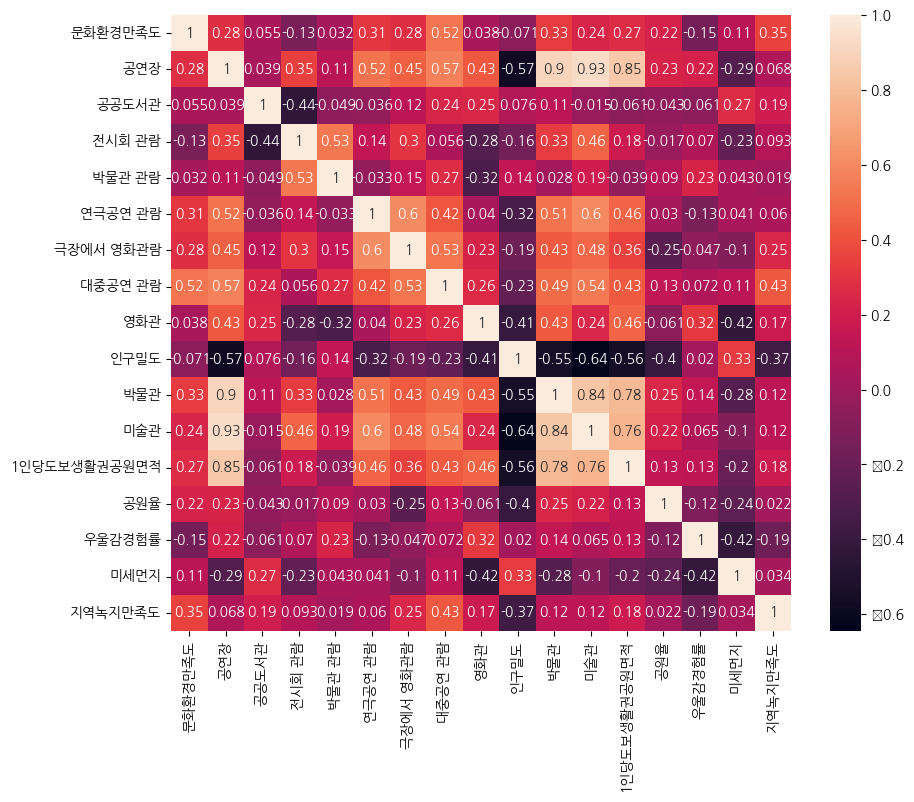

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = final.corr(), annot=True)

In [ ]:
# correlation이 높은 변수들끼리 합쳐서 새로운 변수 생성

final['박물관미술관공연장'] = (final['박물관']+final['미술관']+final['공연장'])/3
final['전시회,박물관 관람'] = (final['전시회 관람']+final['박물관 관람'])/2
final = final.drop(['박물관','미술관','공연장', '전시회 관람', '박물관 관람'],axis=1)
final

,문화환경만족도,공공도서관,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도,박물관미술관공연장,"전시회,박물관 관람"
0,-0.456393,2.495513,0.246113,2.425220,1.871392,2.598826,-0.712690,0.177923,-0.513163,0.007848,-0.443021,1.717326,0.513419,-0.681723
1,0.298511,0.368655,-0.957699,0.248964,0.789662,-0.373687,0.446661,-0.446737,-0.925832,0.105947,0.657401,1.415924,-0.438303,0.487372
2,0.600472,-0.340297,-0.690185,-1.252653,-0.021635,-0.373687,-0.909491,0.191360,2.412508,-1.365536,0.636595,-0.091091,-0.378213,-1.170215
3,0.363217,0.368655,-0.288915,-0.947977,0.789662,0.900247,-0.638998,-0.016356,-1.133089,-0.041202,1.994959,1.214988,-0.315570,-0.468758
4,-0.866199,-1.049250,0.246113,0.096626,0.248798,-0.798332,0.030517,-0.628376,1.065360,0.400243,0.554407,-0.492961,-0.313016,1.025998
5,-0.219138,-0.340297,1.717437,0.466589,-0.562499,0.900247,0.818373,-0.649966,-0.474969,0.547391,-0.684795,-1.932997,-0.296018,-0.610735
6,-0.672080,1.432084,-1.225212,-0.490963,-0.292067,-0.373687,0.863455,-0.618815,-0.603093,-0.041202,1.047580,-0.861342,-0.417754,-0.468758
7,-0.434825,-1.403726,-0.957699,-0.447438,-1.644228,-0.798332,0.398544,-1.070779,-0.402625,2.264121,-1.012383,-0.928321,-0.537934,0.612495
8,-0.542668,0.368655,-1.091455,-1.579091,-1.373796,0.475602,-0.536479,-0.683228,1.021295,-0.482646,0.353826,-1.028788,-0.222103,-1.170215
9,-0.391687,0.368655,-0.823942,-0.382151,-0.292067,-0.798332,-0.347914,-0.725779,1.551730,0.105947,-1.737097,1.081032,-0.438303,1.890286


<Axes: >

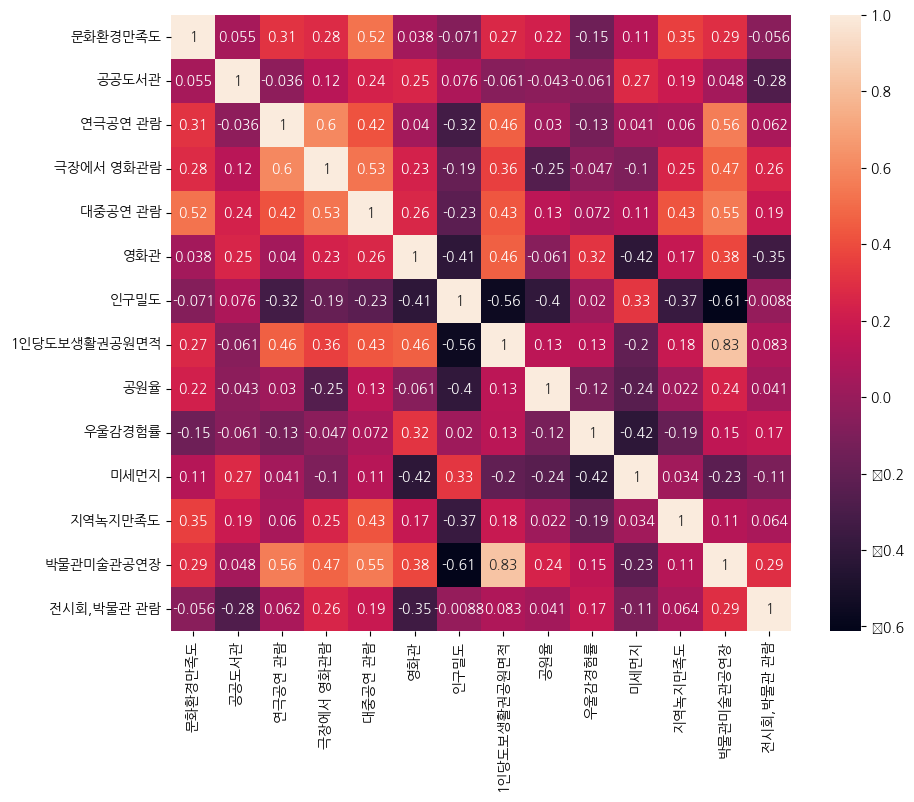

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = final.corr(), annot=True)

# 5. 군집화

## (1) 군집 개수 결정 - 실루엣 분석
- 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

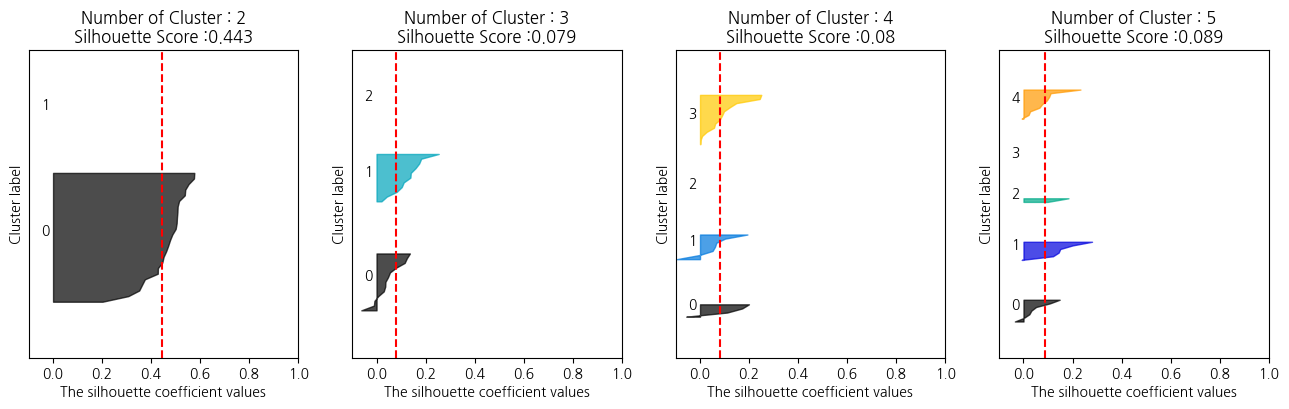

In [ ]:
# 군집 개수가 2개,3개,4개,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],final)

- 두번째로 높은 5로 결정.

## (2) 군집화

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=0)
clusters = kmeans.fit(final)
final['cluster'] = clusters.labels_
final['자치구'] = regions
final.head()

,문화환경만족도,공공도서관,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도,박물관미술관공연장,"전시회,박물관 관람",cluster,자치구
0,-0.456393,2.495513,0.246113,2.425220,1.871392,2.598826,-0.712690,0.177923,-0.513163,0.007848,-0.443021,1.717326,0.513419,-0.681723,0,강남구
1,0.298511,0.368655,-0.957699,0.248964,0.789662,-0.373687,0.446661,-0.446737,-0.925832,0.105947,0.657401,1.415924,-0.438303,0.487372,0,강동구
2,0.600472,-0.340297,-0.690185,-1.252653,-0.021635,-0.373687,-0.909491,0.191360,2.412508,-1.365536,0.636595,-0.091091,-0.378213,-1.170215,1,강북구
3,0.363217,0.368655,-0.288915,-0.947977,0.789662,0.900247,-0.638998,-0.016356,-1.133089,-0.041202,1.994959,1.214988,-0.315570,-0.468758,0,강서구
4,-0.866199,-1.049250,0.246113,0.096626,0.248798,-0.798332,0.030517,-0.628376,1.065360,0.400243,0.554407,-0.492961,-0.313016,1.025998,1,관악구


In [ ]:
final.groupby('cluster').count()

,문화환경만족도,공공도서관,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도,박물관미술관공연장,"전시회,박물관 관람",자치구
cluster,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [ ]:
# 그룹별 특징
final.groupby('cluster').mean()

,문화환경만족도,공공도서관,연극공연 관람,극장에서 영화관람,대중공연 관람,영화관,인구밀도,1인당도보생활권공원면적,공원율,우울감경험률,미세먼지,지역녹지만족도,박물관미술관공연장,"전시회,박물관 관람"
cluster,,,,,,,,,,,,,,
0,0.286186,0.419295,-0.422671,0.137042,0.480597,1.082237,-0.148480,0.256457,-0.505443,0.617462,-0.288383,0.779629,0.044265,-0.291032
1,0.007333,-0.103980,-0.177451,-0.741233,-0.246995,-0.444461,-0.622128,-0.412337,1.318024,-0.531696,-0.090508,0.132171,-0.251194,-0.073513
2,-2.106398,-1.226488,-0.690185,-0.882689,-1.644228,-0.586010,0.134770,-0.366463,-0.721093,1.209559,-0.702418,-0.677152,-0.431111,0.399530
3,1.484789,-0.340297,2.386221,1.685293,2.682688,0.900247,-2.263909,3.763668,1.457826,0.694540,-0.630193,0.076355,4.434259,1.802444
4,0.075634,0.053565,0.335284,0.396465,-0.141827,-0.515236,0.751833,-0.261324,-0.487298,-0.471746,0.510751,-0.552497,-0.263859,-0.013689


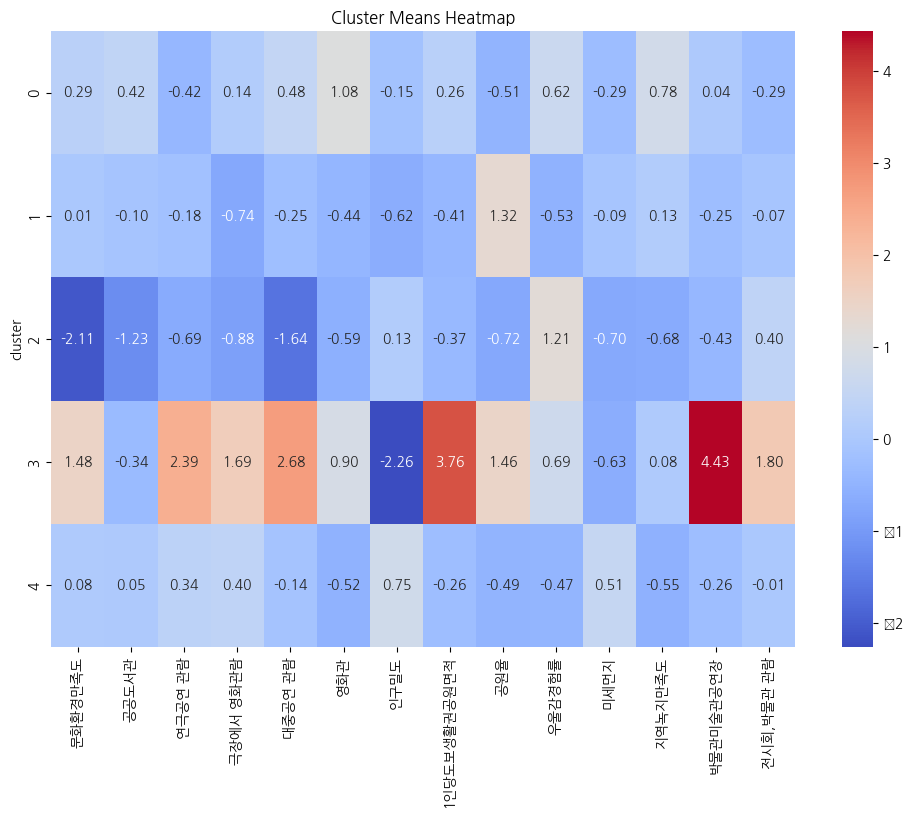

In [ ]:
cluster_means = final.groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Means Heatmap')
plt.show()

In [ ]:
final[final['cluster']==0]['자치구']

0      강남구
1      강동구
3      강서구
12     마포구
13    서대문구
17     송파구
23      중구
Name: 자치구, dtype: object

In [ ]:
final[final['cluster']==1]['자치구']

2     강북구
4     관악구
8     노원구
9     도봉구
14    서초구
21    은평구
Name: 자치구, dtype: object

In [ ]:
final[final['cluster']==2]['자치구']

7      금천구
19    영등포구
Name: 자치구, dtype: object

In [ ]:
final[final['cluster']==3]['자치구']

22    종로구
Name: 자치구, dtype: object

In [ ]:
final[final['cluster']==4]['자치구']

5      광진구
6      구로구
10    동대문구
11     동작구
15     성동구
16     성북구
18     양천구
20     용산구
24     중랑구
Name: 자치구, dtype: object

## (3) 차원축소 및 시각화

In [ ]:
from sklearn.decomposition import PCA
X = final.copy()
X = X.drop('자치구',axis=1)
# X = pd.get_dummies(final.drop(columns=['cluster']))
pca = PCA(n_components = 2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = final['cluster']
pca_df.head()

,0,1,cluster
0,3.800454,0.615115,0
1,1.055354,-1.277447,0
2,0.644092,-1.091122,1
3,1.567631,-1.186961,0
4,-0.097320,-0.647975,1


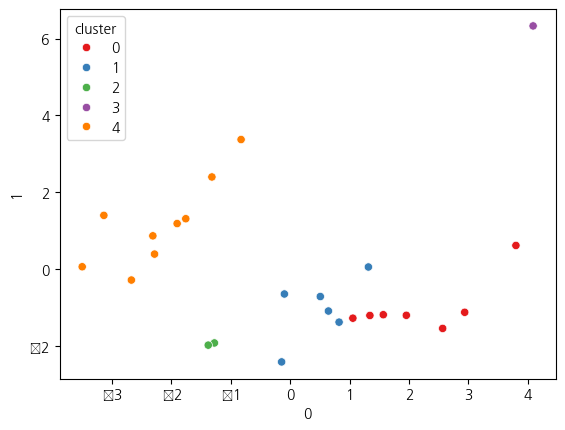

In [ ]:
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(x=0, y=1, hue='cluster', data=pca_df, palette='Set1')